## Working with Complex Network Analysis, in this excercise we will be creating a network nodes and edges and doing some excercise.

### Import libraries required for building graph and plotting on the screen

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Create a Graph with 10 nodes i.e. (1 - 10)

In [2]:
G = nx.Graph()
G.add_nodes_from(range(1,11))
print(G)

Graph with 10 nodes and 0 edges


### Build edge between nodes from 1 - 10, if they are even number example 2,4; 6,6; 2,8; 4,10; 4,6; etc.

[(2, 4), (2, 6), (2, 8), (2, 10), (4, 6), (4, 8), (4, 10), (6, 8), (6, 10), (8, 10)]


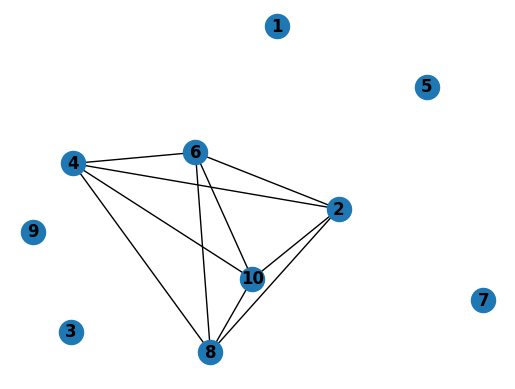

In [3]:
G = nx.Graph()
G.add_nodes_from(range(1,11))
#run an inner loop and step by 2, only add all the even number that is returned by j
for i in range(2,11,2):
    for j in range(i+2,11,2):
        G.add_edge(i,j)

print(G.edges)
pos = nx.spring_layout(G, seed=42, k=2) #configure layout to show some distance between the nodes
fig,ax = plt.subplots()
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', ax=ax)
plt.show()

### Count the self loop in the graph

In [4]:
#the below one does not have any self loop, as we never created one, we created only for the even number 
print("No of self loop : {}".format(len(list(nx.selfloop_edges(G,data=True)))))

No of self loop : 0


### Count the number of edges in the graph

In [5]:
print("No of edges : {} ".format(G.number_of_edges())) #get number of edges

No of edges : 10 


### Print the adjacency list of Graph G

In [6]:
print(G.adj)

{1: {}, 2: {4: {}, 6: {}, 8: {}, 10: {}}, 3: {}, 4: {2: {}, 6: {}, 8: {}, 10: {}}, 5: {}, 6: {2: {}, 4: {}, 8: {}, 10: {}}, 7: {}, 8: {2: {}, 4: {}, 6: {}, 10: {}}, 9: {}, 10: {2: {}, 4: {}, 6: {}, 8: {}}}


### Add weights to the edges in G. Weight of edge(i,j) is i+j

In [12]:
G = nx.Graph()
G.add_nodes_from(range(1,11))
#run an inner loop and step by 2, only add all the even number that is returned by j
for i in range(2,11,2):
    for j in range(i+2,11,2):
        weight= i+j #the addition of i+j will be assigned to weight
        G.add_edge(i,j,weight=weight)

print(G.edges(data=True))

[(2, 4, {'weight': 6}), (2, 6, {'weight': 8}), (2, 8, {'weight': 10}), (2, 10, {'weight': 12}), (4, 6, {'weight': 10}), (4, 8, {'weight': 12}), (4, 10, {'weight': 14}), (6, 8, {'weight': 14}), (6, 10, {'weight': 16}), (8, 10, {'weight': 18})]


### Create a Graph using networkX simmilar to the image below and plot it
![Graph Image](Graph_1.png)

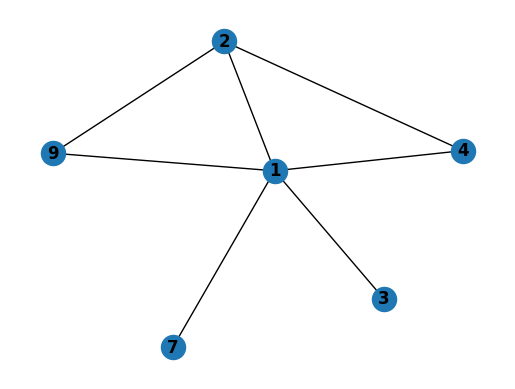

In [17]:
K = nx.Graph([('1','2'),('1','3'),('1','4'),('1','7'),('1','9'),('4','2'),('2','9')])
pos = nx.spring_layout(K, seed=5, k=2) #configure layout to show some distance between the nodes
fig,ax = plt.subplots()
nx.draw(K, pos=pos, with_labels=True, font_weight='bold', ax=ax)
plt.show()

### Add attributes to each node that is name of the people. The edge represents their friendship

In [32]:
#create graph with nodes and edges and with attribute for edge
K = nx.Graph([('1','2',{'friendship':'close'}),('1','3',{'friendship':'colleague'}),('1','4',{'friendship':'close'}),('1','7',{'friendship':'colleague'}),('1','9',{'friendship':'close'}),('4','2',{'friendship':'colleague'}),('2','9',{'friendship':'close'})])

node_names = {
    '1': 'Raj',
    '2': 'Mohan',
    '3': 'Charlie',
    '4': 'Abhi',
    '7': 'Riya',
    '9': 'Meher'
}
#set attribute on the nodes with the names as attribute
nx.set_node_attributes(K, node_names, 'name')

for node in K.nodes(data=True):
    print("Node:", node[0], "Name:", node[1]['name'])
    
print(K.edges(data=True))

Node: 1 Name: Raj
Node: 2 Name: Mohan
Node: 3 Name: Charlie
Node: 4 Name: Abhi
Node: 7 Name: Riya
Node: 9 Name: Meher
[('1', '2', {'friendship': 'close'}), ('1', '3', {'friendship': 'colleague'}), ('1', '4', {'friendship': 'close'}), ('1', '7', {'friendship': 'colleague'}), ('1', '9', {'friendship': 'close'}), ('2', '4', {'friendship': 'colleague'}), ('2', '9', {'friendship': 'close'})]


### Find the node/nodes with maximum number of edges

In [42]:
degrees = K.degree()  #this will show how many times a given node is connected.
print(degrees)

#find the node with maximum degree
max_degree_node = max(K.nodes, key=lambda node: K.degree[node])
print("Node with the maximum degree:", max_degree_node)

#find the degree for that node.
max_degree = K.degree(max_degree_node)
print("Maximum degree:", max_degree)

[('1', 5), ('2', 3), ('3', 1), ('4', 2), ('7', 1), ('9', 2)]
Node with the maximum degree: 1
Maximum degree: 5


### Remove node 9 and corresponding edges

In [47]:
K = nx.Graph([('1','2'),('1','3'),('1','4'),('1','7'),('1','9'),('4','2'),('2','9')])
print("Before removing")
print(K.nodes)
print(K.edges)
K.remove_node('9') #remove node 9
print("After removing")
print(K.nodes)
print(K.edges)

Before removing
['1', '2', '3', '4', '7', '9']
[('1', '2'), ('1', '3'), ('1', '4'), ('1', '7'), ('1', '9'), ('2', '4'), ('2', '9')]
After removing
['1', '2', '3', '4', '7']
[('1', '2'), ('1', '3'), ('1', '4'), ('1', '7'), ('2', '4')]


### Create one adjacency list file. Based on this file, create a graph. Find the nodes with maximum number of edges. Color that node red. Remaining nodes can be colored blue.

Graph with 4 nodes and 4 edges
Max Node :  1


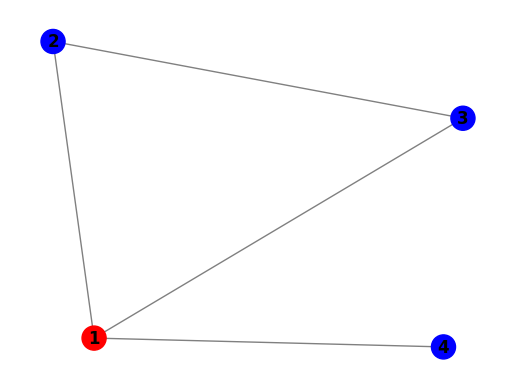

In [69]:
# Read the adjacency list from the file
    
myG = nx.read_adjlist("adjacency_list.txt", "r") 
print(myG)

# Find the node with the maximum degree
max_degree_node = max(myG.nodes, key=lambda node: myG.degree[node])
print("Max Node : ", max_degree_node)

# Color the nodes, red for max node and blue for all others
node_colors = ['red' if node == max_degree_node else 'blue' for node in myG.nodes]

pos = nx.spring_layout(K, seed=5, k=2) #configure layout to show some distance between the nodes
fig,ax = plt.subplots()
nx.draw(myG, pos=pos, with_labels=True, font_weight='bold', ax=ax, node_color=node_colors, edge_color='gray')
plt.show()

### Create a graph from a numpy matrix with 10 nodes and edges created randomly

[[1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 1 0 1]
 [1 1 0 0 1 0 1 0 1 0]
 [0 0 1 1 1 1 1 1 0 0]
 [1 1 0 1 0 0 0 0 0 1]
 [1 1 0 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 0 1 0]
 [0 1 0 1 1 1 0 1 0 1]
 [0 1 1 0 0 1 0 1 1 1]]
Graph with 10 nodes and 39 edges


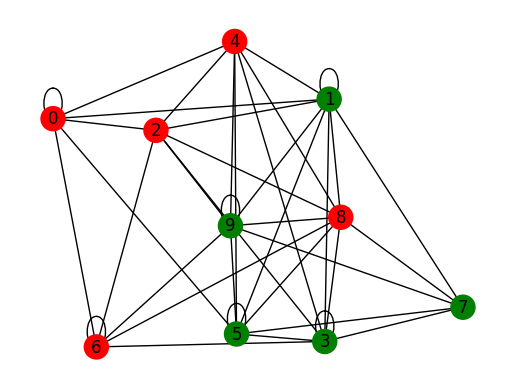

In [87]:
G_mtrx =np.random.randint(2,size=(10,10)) #10X10 size will give us 10 nodes, 2 indicate use 0-1
print(G_mtrx)
G=nx.Graph(G_mtrx) #create a graph from the random matrix, in this the the edge will be created randomly
print(G)
color_map = ['red' if node%2 == 0 else 'green' for node in G]    
fig,ax = plt.subplots()
nx.draw(G, node_color=color_map, with_labels=True,ax=ax) # node lables
plt.show()